In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
X_train = np.load('../numpy/X_train.npy')
X_test = np.load('../numpy/X_val.npy')
y_train = np.load('../numpy/y_train.npy')
y_test = np.load('../numpy/y_val.npy')

In [3]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(32547, 48, 48, 1) (8146, 48, 48, 1)
(32547, 8) (8146, 8)


In [4]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block1_conv1', input_shape=(48, 48, 1) ))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block1_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block1_maxpool'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block2_conv1'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block2_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block2_maxpool'))

model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block3_conv1'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block3_conv2'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block3_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block3_maxpool'))

model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block4_conv1'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block4_conv2'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block4_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block4_maxpool'))

model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block5_conv1'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block5_conv2'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block5_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block5_maxpool'))

model.add(Flatten())
model.add(Dense(4096, kernel_regularizer=l2(1e-7), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4096, kernel_regularizer=l2(1e-7), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_maxpool (MaxPooling2  (None, 24, 24, 64)       0         
 D)                                                              
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_maxpool (MaxPooling2  (None, 12, 12, 128)      0         
 D)                                                     

In [5]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [6]:
best_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/VGG16-best_loss_model.h5',
    monitor='loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/VGG16-best_val_loss_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

In [13]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/20
509/509 [==============================] - 2378s 5s/step - loss: 1.8296 - accuracy: 0.2613 - val_loss: 1.6533 - val_accuracy: 0.3080
Epoch 2/20
509/509 [==============================] - 2340s 5s/step - loss: 1.6379 - accuracy: 0.3337 - val_loss: 1.5417 - val_accuracy: 0.3532
Epoch 3/20
509/509 [==============================] - 2367s 5s/step - loss: 1.4930 - accuracy: 0.4003 - val_loss: 1.3642 - val_accuracy: 0.4540
Epoch 4/20
509/509 [==============================] - 2998s 6s/step - loss: 1.3727 - accuracy: 0.4517 - val_loss: 1.2398 - val_accuracy: 0.5101
Epoch 5/20
509/509 [==============================] - 3450s 7s/step - loss: 1.2754 - accuracy: 0.5012 - val_loss: 1.2093 - val_accuracy: 0.5249
Epoch 6/20
509/509 [==============================] - 3070s 6s/step - loss: 1.2141 - accuracy: 0.5303 - val_loss: 1.1485 - val_accuracy: 0.5635
Epoch 7/20
509/509 [==============================] - 2315s 5s/step - loss: 1.1635 - accuracy: 0.5517 - val_loss: 1.1071 - val_accuracy:

In [14]:
np.save('../numpy/history-1.npy', history)

INFO:tensorflow:Assets written to: ram://7cfba6c5-83c7-43dc-9f1f-f5cb65015b6e/assets


In [15]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [16]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/20
509/509 [==============================] - 2516s 5s/step - loss: 0.8217 - accuracy: 0.6960 - val_loss: 0.9159 - val_accuracy: 0.6624
Epoch 2/20
509/509 [==============================] - 2484s 5s/step - loss: 0.8053 - accuracy: 0.6995 - val_loss: 0.9173 - val_accuracy: 0.6647
Epoch 3/20
509/509 [==============================] - 2484s 5s/step - loss: 0.7884 - accuracy: 0.7067 - val_loss: 0.9373 - val_accuracy: 0.6608
Epoch 4/20
509/509 [==============================] - 2484s 5s/step - loss: 0.7804 - accuracy: 0.7110 - val_loss: 0.9055 - val_accuracy: 0.6736
Epoch 5/20
509/509 [==============================] - 2479s 5s/step - loss: 0.7585 - accuracy: 0.7195 - val_loss: 0.9416 - val_accuracy: 0.6670
Epoch 6/20
509/509 [==============================] - 2481s 5s/step - loss: 0.7557 - accuracy: 0.7199 - val_loss: 0.9001 - val_accuracy: 0.6764
Epoch 7/20
509/509 [==============================] - 2490s 5s/step - loss: 0.7358 - accuracy: 0.7296 - val_loss: 0.8997 - val_accuracy:

In [17]:
np.save('../numpy/history-2.npy', history)

INFO:tensorflow:Assets written to: ram://bfba1a67-fcac-44a8-8643-89a6120e22e0/assets


In [11]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [12]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/20
509/509 [==============================] - 2558s 5s/step - loss: 0.5677 - accuracy: 0.7928 - val_loss: 1.0047 - val_accuracy: 0.6773
Epoch 2/20
509/509 [==============================] - 2463s 5s/step - loss: 0.5583 - accuracy: 0.7967 - val_loss: 0.9452 - val_accuracy: 0.6889
Epoch 3/20
509/509 [==============================] - 2555s 5s/step - loss: 0.5510 - accuracy: 0.8013 - val_loss: 0.9546 - val_accuracy: 0.6904
Epoch 4/20
509/509 [==============================] - 2417s 5s/step - loss: 0.5321 - accuracy: 0.8065 - val_loss: 0.9453 - val_accuracy: 0.6914
Epoch 5/20
509/509 [==============================] - 2416s 5s/step - loss: 0.5318 - accuracy: 0.8087 - val_loss: 0.9593 - val_accuracy: 0.6960
Epoch 6/20
509/509 [==============================] - 2392s 5s/step - loss: 0.5163 - accuracy: 0.8130 - val_loss: 0.9611 - val_accuracy: 0.7046
Epoch 7/20
 15/509 [..............................] - ETA: 34:34 - loss: 0.5451 - accuracy: 0.8042

KeyboardInterrupt: 

In [7]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [8]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/10
509/509 [==============================] - 2480s 5s/step - loss: 0.5160 - accuracy: 0.8133 - val_loss: 1.0528 - val_accuracy: 0.6771
Epoch 2/10
509/509 [==============================] - 2442s 5s/step - loss: 0.5049 - accuracy: 0.8165 - val_loss: 0.9444 - val_accuracy: 0.6884
Epoch 3/10
509/509 [==============================] - 2435s 5s/step - loss: 0.4970 - accuracy: 0.8196 - val_loss: 0.9506 - val_accuracy: 0.6945
Epoch 4/10
509/509 [==============================] - 2439s 5s/step - loss: 0.4855 - accuracy: 0.8245 - val_loss: 1.0116 - val_accuracy: 0.6833
Epoch 5/10
235/509 [============>.................] - ETA: 20:45 - loss: 0.4717 - accuracy: 0.8295

KeyboardInterrupt: 

In [7]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [8]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]``
)

Epoch 1/20
509/509 [==============================] - 2428s 5s/step - loss: 0.4826 - accuracy: 0.8259 - val_loss: 1.0362 - val_accuracy: 0.6933
Epoch 2/20
509/509 [==============================] - 3335s 7s/step - loss: 0.4799 - accuracy: 0.8266 - val_loss: 1.0405 - val_accuracy: 0.6979
Epoch 3/20
509/509 [==============================] - 3448s 7s/step - loss: 0.4640 - accuracy: 0.8313 - val_loss: 1.0211 - val_accuracy: 0.6814
Epoch 4/20
509/509 [==============================] - 2656s 5s/step - loss: 0.4589 - accuracy: 0.8333 - val_loss: 1.0593 - val_accuracy: 0.6969
Epoch 5/20
509/509 [==============================] - 2383s 5s/step - loss: 0.4474 - accuracy: 0.8363 - val_loss: 1.0002 - val_accuracy: 0.6908
Epoch 6/20
509/509 [==============================] - 3044s 6s/step - loss: 0.4396 - accuracy: 0.8409 - val_loss: 1.0517 - val_accuracy: 0.6913
Epoch 7/20
509/509 [==============================] - 4788s 9s/step - loss: 0.4310 - accuracy: 0.8437 - val_loss: 1.1028 - val_accuracy:

In [7]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [13]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=30,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/30
509/509 [==============================] - 2438s 5s/step - loss: 0.3355 - accuracy: 0.8811 - val_loss: 1.2044 - val_accuracy: 0.7001
Epoch 2/30
351/509 [===================>..........] - ETA: 12:19 - loss: 0.3137 - accuracy: 0.8865

In [8]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=29,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
) 

Epoch 1/29
509/509 [==============================] - 2594s 5s/step - loss: 0.3428 - accuracy: 0.8758 - val_loss: 1.1676 - val_accuracy: 0.6954
Epoch 2/29
509/509 [==============================] - 3389s 7s/step - loss: 0.3381 - accuracy: 0.8766 - val_loss: 1.2337 - val_accuracy: 0.7005
Epoch 3/29
509/509 [==============================] - 3206s 6s/step - loss: 0.3413 - accuracy: 0.8778 - val_loss: 1.2895 - val_accuracy: 0.6946
Epoch 4/29
509/509 [==============================] - 2453s 5s/step - loss: 0.3343 - accuracy: 0.8799 - val_loss: 1.1416 - val_accuracy: 0.6959
Epoch 5/29
509/509 [==============================] - 2444s 5s/step - loss: 0.3278 - accuracy: 0.8819 - val_loss: 1.1554 - val_accuracy: 0.7027
Epoch 6/29
509/509 [==============================] - 2445s 5s/step - loss: 0.3178 - accuracy: 0.8868 - val_loss: 1.2272 - val_accuracy: 0.6973
Epoch 7/29
509/509 [==============================] - 2437s 5s/step - loss: 0.3181 - accuracy: 0.8843 - val_loss: 1.3025 - val_accuracy:

In [21]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [22]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
) 

Epoch 1/20
1018/1018 [==============================] - 2605s 3s/step - loss: 0.3762 - accuracy: 0.8689 - val_loss: 1.2362 - val_accuracy: 0.6895
Epoch 2/20
1018/1018 [==============================] - 2607s 3s/step - loss: 0.3277 - accuracy: 0.8856 - val_loss: 1.2156 - val_accuracy: 0.6978
Epoch 3/20
1018/1018 [==============================] - 2608s 3s/step - loss: 0.3040 - accuracy: 0.8906 - val_loss: 1.3580 - val_accuracy: 0.6919
Epoch 4/20
1018/1018 [==============================] - 2597s 3s/step - loss: 0.3037 - accuracy: 0.8916 - val_loss: 1.2858 - val_accuracy: 0.7039
Epoch 5/20
1018/1018 [==============================] - 2585s 3s/step - loss: 0.2992 - accuracy: 0.8963 - val_loss: 1.1954 - val_accuracy: 0.6906
Epoch 6/20
1018/1018 [==============================] - 2587s 3s/step - loss: 0.3024 - accuracy: 0.8941 - val_loss: 1.2914 - val_accuracy: 0.6999
Epoch 7/20
1018/1018 [==============================] - 2586s 3s/step - loss: 0.2971 - accuracy: 0.8972 - val_loss: 1.2114 -

KeyboardInterrupt: 

In [23]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [24]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=23,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
) 

Epoch 1/23
509/509 [==============================] - 2462s 5s/step - loss: 0.1721 - accuracy: 0.9397 - val_loss: 1.6564 - val_accuracy: 0.7061
Epoch 2/23
509/509 [==============================] - 2457s 5s/step - loss: 0.1759 - accuracy: 0.9382 - val_loss: 1.4722 - val_accuracy: 0.7028
Epoch 3/23
509/509 [==============================] - 2462s 5s/step - loss: 0.1824 - accuracy: 0.9348 - val_loss: 1.4619 - val_accuracy: 0.6958
Epoch 4/23
509/509 [==============================] - 2458s 5s/step - loss: 0.1796 - accuracy: 0.9365 - val_loss: 1.4727 - val_accuracy: 0.7075
Epoch 5/23
509/509 [==============================] - 2453s 5s/step - loss: 0.1906 - accuracy: 0.9339 - val_loss: 1.4122 - val_accuracy: 0.6929
Epoch 6/23
509/509 [==============================] - 2468s 5s/step - loss: 0.1959 - accuracy: 0.9303 - val_loss: 1.4363 - val_accuracy: 0.7056
Epoch 7/23
509/509 [==============================] - 2459s 5s/step - loss: 0.1896 - accuracy: 0.9333 - val_loss: 1.4053 - val_accuracy:

In [37]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [39]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
) 

Epoch 1/10
509/509 [==============================] - 2545s 5s/step - loss: 0.2037 - accuracy: 0.9284 - val_loss: 1.3730 - val_accuracy: 0.7026
Epoch 2/10
509/509 [==============================] - 2518s 5s/step - loss: 0.2016 - accuracy: 0.9297 - val_loss: 1.3869 - val_accuracy: 0.7061
Epoch 3/10
509/509 [==============================] - 2498s 5s/step - loss: 0.2011 - accuracy: 0.9299 - val_loss: 1.2807 - val_accuracy: 0.7000
Epoch 4/10
509/509 [==============================] - 2538s 5s/step - loss: 0.2033 - accuracy: 0.9277 - val_loss: 1.4262 - val_accuracy: 0.7006
Epoch 5/10
509/509 [==============================] - 2469s 5s/step - loss: 0.2040 - accuracy: 0.9293 - val_loss: 1.3218 - val_accuracy: 0.7035
Epoch 6/10
509/509 [==============================] - 2465s 5s/step - loss: 0.2033 - accuracy: 0.9289 - val_loss: 1.4813 - val_accuracy: 0.7023
Epoch 7/10
509/509 [==============================] - 2464s 5s/step - loss: 0.2071 - accuracy: 0.9285 - val_loss: 1.5882 - val_accuracy:

In [40]:
model.load_weights('../models/VGG16-best_loss_model.h5')

In [41]:
loss, acc = model.evaluate(X_train, y_train)
loss, acc

1018/1018 [==============================] - 507s 498ms/step - loss: 0.1244 - accuracy: 0.9554


(0.12437209486961365, 0.9554490447044373)

In [42]:
predictions = model.predict(X_train)
confusion = confusion_matrix(
    np.argmax(y_train, axis=1),
    np.argmax(predictions, axis=1)
)
confusion

array([[3816,    1,    7,   46,    3,   27,   27,   19],
       [   1, 2036,   34,    1,    1,    2,    0,    2],
       [  10,   16, 2234,    0,    0,    0,    0,    1],
       [  81,    0,    0, 3850,    4,   35,   37,   80],
       [  40,    1,    0,   28, 7028,   42,    9,   31],
       [  51,    0,    0,   30,   58, 4747,   55,    8],
       [ 170,    0,    3,  226,    4,  177, 4270,    7],
       [  11,    0,    1,   40,   15,    6,    2, 3116]], dtype=int64)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

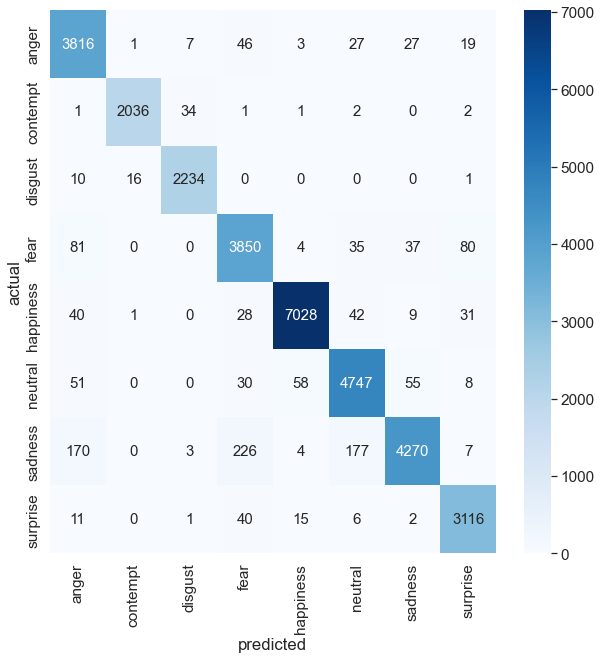

In [43]:
labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [44]:
model.load_weights('../models/VGG16-best_val_loss_model.h5')

In [45]:
loss, acc = model.evaluate(X_test, y_test)
loss, acc

255/255 [==============================] - 195s 765ms/step - loss: 1.1416 - accuracy: 0.6959


(1.1415736675262451, 0.6959244012832642)

In [46]:
predictions = model.predict(X_test)
confusion = confusion_matrix(
    np.argmax(y_test, axis=1),
    np.argmax(predictions, axis=1)
)
confusion

array([[ 589,    2,    7,   78,   35,  154,  108,   17],
       [   0,  505,    7,    0,    0,    4,    0,    4],
       [  31,   18,  494,    8,    1,    3,   14,    2],
       [ 161,    0,    3,  449,   23,  136,  157,   96],
       [  64,    1,    1,   35, 1503,  118,   35,   39],
       [  90,    2,    0,   43,   57,  893,  126,   20],
       [ 136,    1,    3,  157,   39,  276,  587,   15],
       [  34,    0,    1,   42,   37,   27,    9,  649]], dtype=int64)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

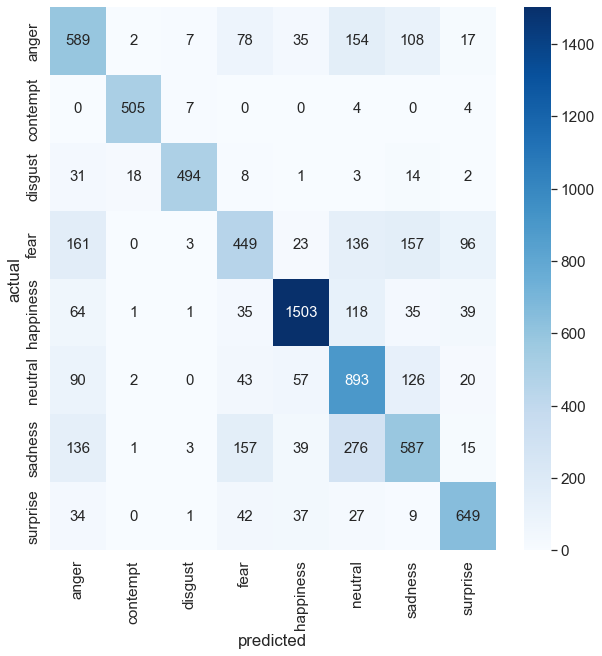

In [47]:
labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (10, 10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [48]:
loss_arr = np.load('../numpy/loss_arr.npy')
val_loss_arr = np.load('../numpy/val_loss_arr.npy')
acc_arr = np.load('../numpy/acc_arr.npy')
val_acc_arr = np.load('../numpy/val_acc_arr.npy')

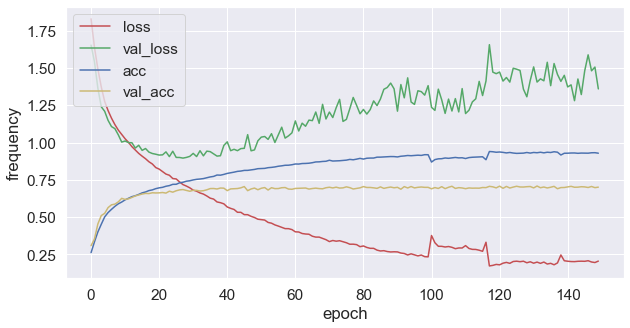

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(loss_arr, 'r-', label='loss')
plt.plot(val_loss_arr, 'g-', label='val_loss')
plt.plot(acc_arr, 'b-', label='acc')
plt.plot(val_acc_arr, 'y-', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('frequency')
plt.legend()
plt.show()